### Importaciones

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp
from sympy import symbols, Function, dsolve, exp, sin, pi, tan, sympify

In [13]:
sp.tan(3/20)

0.151135218058295

In [2]:
# Definir el símbolo t
t = sp.symbols('t')

# Definir la función simbólica
funcion_simbolica = 2 * sp.atan(sp.tan(3/20) * sp.exp(sp.exp(t) - 1))

funcion_simbolica

2*atan(0.151135218058295*exp(exp(t) - 1))

*Digite el numero de iteraciones deseadas:*

In [5]:
numero_iteraciones = 420

*Digite el valor inicial en t:*

In [6]:
paso_inicial_T = -4

*Digite el valor final en t:*

In [7]:
paso_final_T = 10

*Digite la condicion inicial de $x(t)$:*

In [47]:
paso_inicial_X1 = 0.3
#paso_inicial_X2 = 0.3001
#paso_inicial_X3 = 0.3002

*A continuación calcularemos el $\Delta t$*

In [8]:
delta_T = (paso_final_T - paso_inicial_T)/numero_iteraciones
delta_T

0.03333333333333333

### Iniciemos con la solucion exacta

In [9]:
# Creamos una lista con un solo elemento de nuestro valore inicial de t
vector_T_funcion_real = np.array([paso_inicial_T])
        
# Iteramos para crear el vector para realizar la graficación de la funcion exacta
for iteracion in range(numero_iteraciones):
    t_i = (vector_T_funcion_real[iteracion] + delta_T) 
    vector_T_funcion_real = np.append(vector_T_funcion_real, t_i)

# Evaluamos la función en cada valor de tiempo y almacenamos los resultados en una lista
vector_f_solucion = [funcion_simbolica.subs({t: valor}) for valor in list(vector_T_funcion_real)]

In [11]:
funcion_simbolica

2*atan(0.151135218058295*exp(exp(t) - 1))

### Definición de las variables simbolicas

In [10]:
t, x = sp.symbols('t x')

Creamos la funcion programatica $f$  
Como parametro tenemos la funcion que creamos, si no le pasamos este parametro usa nuestra funcion por defecto

In [51]:
""" func_f = funcion_f(fun)
(func_f.evalf(subs ={x:2,t:2})).evalf() """
funcion_prueba = sp.sympify("sin(x)")
funcion_prueba2 = sp.exp(t)

In [52]:
func_f = funcion_prueba*funcion_prueba2

## Metodo de Runge-Kutta (Euler de cuarto orden)

$x_{k+1} = x_{k} + (\frac{m_{k} + 2n_{k} + 2p_{k} + q_{k}}{6})\Delta t $

In [53]:
# Creamos dos listas con un solo elemento que son nuestros valores iniciales
vector_T_rk1 = np.array([paso_inicial_T])
vector_X_rk1 = np.array([paso_inicial_X1]) 
        
# Iteramos para crear los vectores para realizar la graficación
for iteracion in range(numero_iteraciones):
    dic_eval_rk_m = {
        t: vector_T_rk1[iteracion],
        x: vector_X_rk1[iteracion]
    }
    m_i = func_f.subs(dic_eval_rk_m).evalf()

    dic_eval_rk_n = {
        t: vector_T_rk1[iteracion] + (delta_T/2),
        x: vector_X_rk1[iteracion] + m_i * (delta_T/2)
    }
    n_i = func_f.subs(dic_eval_rk_n).evalf()
    
    dic_eval_rk_p = {
        t: vector_T_rk1[iteracion] + (delta_T/2),
        x: vector_X_rk1[iteracion] + n_i * (delta_T/2)
    }
    p_i = func_f.subs(dic_eval_rk_p).evalf()

    t_i = vector_T_rk1[iteracion] + delta_T
    vector_T_rk1 = np.append(vector_T_rk1, t_i)

    dic_eval_rk_q = {
        t: vector_T_rk1[iteracion + 1] + (delta_T/2),
        x: vector_X_rk1[iteracion] + p_i * (delta_T)
    }
    q_i = func_f.subs(dic_eval_rk_q).evalf()

    x_i = vector_X_rk1[iteracion] + (delta_T/6) * (m_i + 2 * n_i + 2 * p_i + q_i)

    # Almacenamos cada una de las iteraciones en los diferentes vectores
    vector_X_rk1 = np.append(vector_X_rk1, x_i)

In [54]:
# Creamos dos listas con un solo elemento que son nuestros valores iniciales
vector_T_rk2 = np.array([paso_inicial_T])
vector_X_rk2 = np.array([paso_inicial_X2]) 
        
# Iteramos para crear los vectores para realizar la graficación
for iteracion in range(numero_iteraciones):
    dic_eval_rk_m = {
        t: vector_T_rk2[iteracion],
        x: vector_X_rk2[iteracion]
    }
    m_i = func_f.subs(dic_eval_rk_m).evalf()

    dic_eval_rk_n = {
        t: vector_T_rk2[iteracion] + (delta_T/2),
        x: vector_X_rk2[iteracion] + m_i * (delta_T/2)
    }
    n_i = func_f.subs(dic_eval_rk_n).evalf()
    
    dic_eval_rk_p = {
        t: vector_T_rk2[iteracion] + (delta_T/2),
        x: vector_X_rk2[iteracion] + n_i * (delta_T/2)
    }
    p_i = func_f.subs(dic_eval_rk_p).evalf()

    t_i = vector_T_rk2[iteracion] + delta_T
    vector_T_rk2 = np.append(vector_T_rk2, t_i)

    dic_eval_rk_q = {
        t: vector_T_rk2[iteracion + 1] + (delta_T/2),
        x: vector_X_rk2[iteracion] + p_i * (delta_T)
    }
    q_i = func_f.subs(dic_eval_rk_q).evalf()

    x_i = vector_X_rk2[iteracion] + (delta_T/6) * (m_i + 2 * n_i + 2 * p_i + q_i)

    # Almacenamos cada una de las iteraciones en los diferentes vectores
    vector_X_rk2 = np.append(vector_X_rk2, x_i)

In [55]:
# Creamos dos listas con un solo elemento que son nuestros valores iniciales
vector_T_rk3 = np.array([paso_inicial_T])
vector_X_rk3 = np.array([paso_inicial_X3]) 
        
# Iteramos para crear los vectores para realizar la graficación
for iteracion in range(numero_iteraciones):
    dic_eval_rk_m = {
        t: vector_T_rk3[iteracion],
        x: vector_X_rk3[iteracion]
    }
    m_i = func_f.subs(dic_eval_rk_m).evalf()

    dic_eval_rk_n = {
        t: vector_T_rk3[iteracion] + (delta_T/2),
        x: vector_X_rk3[iteracion] + m_i * (delta_T/2)
    }
    n_i = func_f.subs(dic_eval_rk_n).evalf()
    
    dic_eval_rk_p = {
        t: vector_T_rk3[iteracion] + (delta_T/2),
        x: vector_X_rk3[iteracion] + n_i * (delta_T/2)
    }
    p_i = func_f.subs(dic_eval_rk_p).evalf()

    t_i = vector_T_rk3[iteracion] + delta_T
    vector_T_rk3 = np.append(vector_T_rk3, t_i)

    dic_eval_rk_q = {
        t: vector_T_rk3[iteracion + 1] + (delta_T/2),
        x: vector_X_rk3[iteracion] + p_i * (delta_T)
    }
    q_i = func_f.subs(dic_eval_rk_q).evalf()

    x_i = vector_X_rk3[iteracion] + (delta_T/6) * (m_i + 2 * n_i + 2 * p_i + q_i)

    # Almacenamos cada una de las iteraciones en los diferentes vectores
    vector_X_rk3 = np.append(vector_X_rk3, x_i)

### Si requiere ver los vectores resultantes basta expandir y correr las siguientes celdas

In [56]:
vector_f_solucion

[0.113133703876801,
 0.113203810377094,
 0.113276338627292,
 0.113351373879006,
 0.113429004494971,
 0.113509322070112,
 0.113592421557829,
 0.113678401401754,
 0.113767363673254,
 0.113859414214967,
 0.113954662790683,
 0.114053223241878,
 0.114155213651252,
 0.114260756513636,
 0.114369978914638,
 0.114483012717451,
 0.114599994758232,
 0.114721067050537,
 0.114846376999269,
 0.114976077624675,
 0.115110327796931,
 0.115249292481891,
 0.115393142998636,
 0.115542057289462,
 0.115696220203020,
 0.115855823791352,
 0.116021067621614,
 0.116192159103335,
 0.116369313832115,
 0.116552755950731,
 0.116742718528670,
 0.116939443961188,
 0.117143184389081,
 0.117354202140403,
 0.117572770195480,
 0.117799172676663,
 0.118033705364336,
 0.118276676240836,
 0.118528406064044,
 0.118789228972528,
 0.119059493124274,
 0.119339561371160,
 0.119629811971519,
 0.119930639343296,
 0.120242454860472,
 0.120565687695676,
 0.120900785712072,
 0.121248216407891,
 0.121608467917205,
 0.121982050070846,


In [57]:
vector_X_rk1

array([0.3, 0.300184039317998, 0.300374431787586, 0.300571400754144,
       0.300775177692425, 0.300986002521405, 0.301204123932598,
       0.301429799732485, 0.301663297199763, 0.301904893458142,
       0.302154875865457, 0.302413542419934, 0.302681202184464,
       0.302958175729804, 0.303244795597683, 0.303541406784849,
       0.303848367249127, 0.304166048438673, 0.304494835845630,
       0.304835129585506, 0.305187345003633, 0.305551913310210,
       0.305929282245447, 0.306319916776510, 0.306724299827992,
       0.307142933047810, 0.307576337610509, 0.308025055060104,
       0.308489648194707, 0.308970701995367, 0.309468824601674,
       0.309984648336871, 0.310518830785395, 0.311072055925965,
       0.311645035323534, 0.312238509383675, 0.312853248673189,
       0.313490055310996, 0.314149764433660, 0.314833245740180,
       0.315541405121044, 0.316275186376850, 0.317035573032218,
       0.317823590251112, 0.318640306860122, 0.319486837486758,
       0.320364344820307, 0.3212740

In [69]:
1420/20

71.0

### Grafica trajando

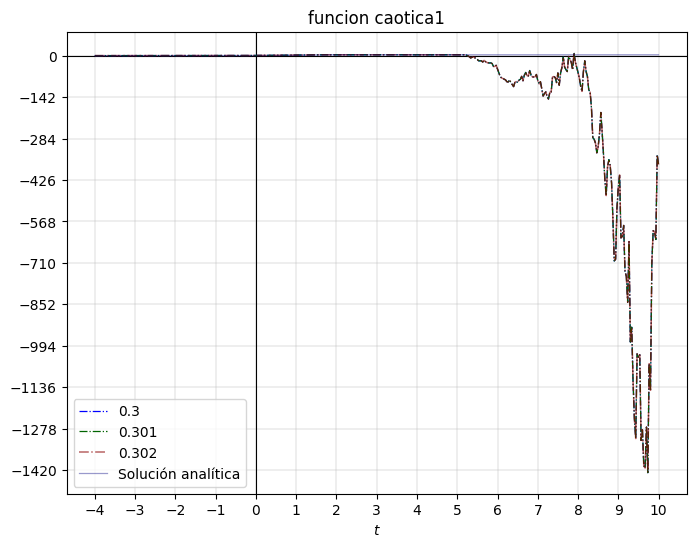

In [72]:
plt.figure(figsize=(8, 6))
#plt.text(-0.54, 1.15, 'x(t)', rotation='horizontal', fontsize=12)  # Colocar 'x(t)' verticalmente
plt.xticks(np.arange(-4, 11, 1))  # Marcas cada unidad en el eje x
plt.yticks(np.arange(-1420, 142, 142))  # Marcas cada unidad en el eje y
plt.grid(True, linewidth=0.3)  # Ajusta el ancho de las líneas de la cuadrícula
plt.axhline(0, color='black', linewidth=0.8)  # Línea horizontal en y=0
plt.axvline(0, color='black', linewidth=0.8)  # Línea vertical en x=0
plt.xlabel('$t$')
plt.plot(
    vector_T_rk1,
    vector_X_rk1,
    label="0.3",
    color='blue',
    linestyle='-.',
    linewidth=0.9,
    markersize=12, 
)
plt.plot(
    vector_T_rk2,
    vector_X_rk2,
    label="0.301",
    color='darkgreen',
    linestyle='-.',
    linewidth=0.9,
    markersize=12, 
)
plt.plot(
    vector_T_rk3,
    vector_X_rk3,
    label="0.302",
    color='darkred',
    linestyle='-.',
    alpha = 0.6,
    linewidth=1.1,
    markersize=12, 
)
plt.plot(
    vector_T_funcion_real,
    vector_f_solucion,
    label="Solución analítica",
    color='navy',
    linestyle='-',
    alpha = 0.4,
    linewidth=0.9,
    markersize=12, 
)
plt.legend()  # Esto coloca la leyenda en la esquina superior izquierda
plt.title("funcion caotica1")
plt.savefig("funcion caotica1.pdf")  # Con esta se guarda la imagen en formato pdf
plt.show()

### Grafica inicial

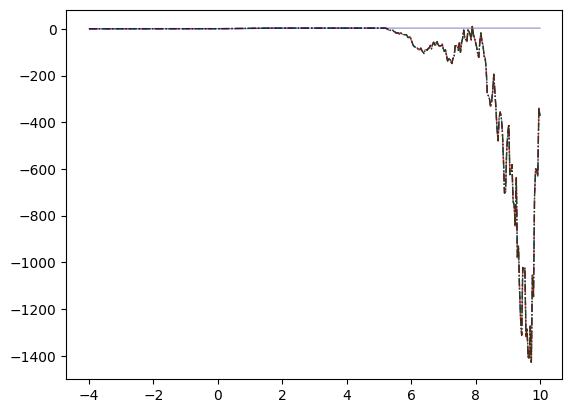

In [59]:
plt.plot(
    vector_T_rk1,
    vector_X_rk1,
    label="0.3",
    color='blue',
    linestyle='-.',
    linewidth=0.9,
    markersize=12, 
)
plt.plot(
    vector_T_rk2,
    vector_X_rk2,
    label="0.301",
    color='darkgreen',
    linestyle='-.',
    linewidth=0.9,
    markersize=12, 
)
plt.plot(
    vector_T_rk3,
    vector_X_rk3,
    label="0.302",
    color='darkred',
    linestyle='-.',
    alpha = 0.6,
    linewidth=1.1,
    markersize=12, 
)
plt.plot(
    vector_T_funcion_real,
    vector_f_solucion,
    label="Solución analítica",
    color='navy',
    linestyle='-',
    alpha = 0.4,
    linewidth=0.9,
    markersize=12, 
)
plt.show()